In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
e_x = 0.15
e_y = 0.10

sd_x = 0.12
sd_y = 0.16
rho = 0.67


def portfolio(w_x):
    w_y = 1 - w_x
    e_p = w_x * e_x + w_y * e_y
    var_p = w_x ** 2 * sd_x ** 2 + w_y ** 2 * sd_y ** 2 + 2 * w_x * w_y * rho * sd_x * sd_y
    return w_y, e_p, var_p

<Axes: xlabel='Variance', ylabel='Expected return'>

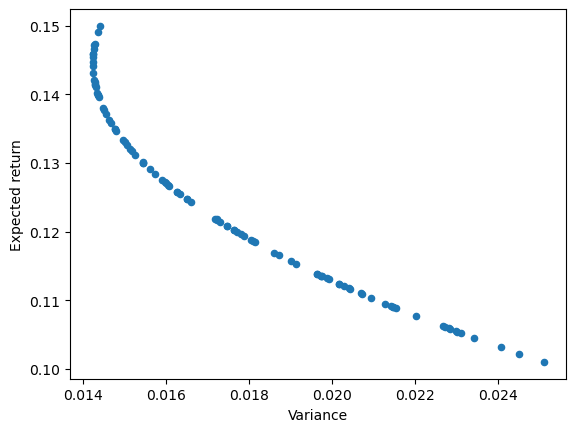

In [15]:
w_x = np.random.rand(100)
portfolios = []

for i in w_x:
    portfolios.append(portfolio(i))

portfolios = pd.DataFrame(portfolios, columns=['Weight', 'Expected return', 'Variance'])
portfolios.plot.scatter(x='Variance', y='Expected return')

In [16]:
# Find the minimum variance portfolio
min_var = portfolios['Variance'].min()
min_var_df = portfolios[portfolios['Variance'] == min_var]

# Find efficient frontier
min_return = min_var_df['Expected return'].values[0]
eff_frontier = portfolios[portfolios['Expected return'] >= min_return]
eff_frontier

,Weight,Expected return,Variance
3,0.089432,0.145528,0.014239
29,0.000070,0.149997,0.014400
32,0.052636,0.147368,0.014278
37,0.055117,0.147244,0.014274
72,0.017587,0.149121,0.014350
81,0.068061,0.146597,0.014257
85,0.083032,0.145848,0.014243
88,0.104777,0.144761,0.014235
95,0.082499,0.145875,0.014244


<Axes: xlabel='Variance', ylabel='Expected return'>

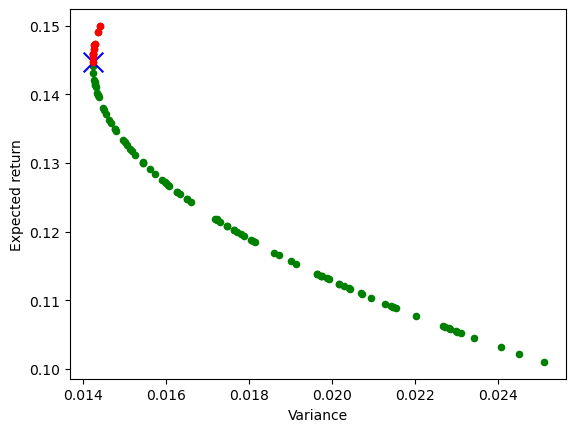

In [22]:
fig, ax = plt.subplots()

portfolios.plot(x='Variance', y='Expected return', kind='scatter', color='green', ax=ax)
min_var_df.plot(x='Variance', y='Expected return', kind='scatter', color='blue', ax=ax, marker='x', s=200)
eff_frontier.plot(x='Variance', y='Expected return', kind='scatter', color='red', ax=ax)